# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [3]:
np.logspace(-4, 4, 3)

array([1.e-04, 1.e+00, 1.e+04])

In [4]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {'pca__n_components':[4, 10, 20, 30, 40, 50, 64], 
              'logistic__alpha':np.logspace(-4, 4, 5)}
grid = GridSearchCV(pipe, param_grid, iid=False, cv=5)
grid.fit(X_digits, y_digits)
#print(grid.bes)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=...dom_state=0, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'pca__n_components': [4, 10, 20, 30, 40, 50, 64], 'logistic__alpha': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [5]:
print('CV_best_score:', grid.best_score_)
print('CV_best_param:', grid.best_params_)

CV_best_score: 0.9148395755785979
CV_best_param: {'logistic__alpha': 0.01, 'pca__n_components': 30}


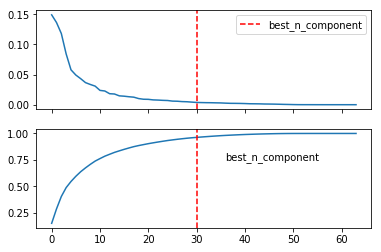

In [6]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.plot(pca.explained_variance_ratio_)
ax0.axvline(grid.best_params_['pca__n_components'], 0, 1, color='r', linestyle='--', label = 'best_n_component')
ax0.legend(loc='best')
#ax0.text(grid.best_params_['pca__n_components']+3, max(pca.explained_variance_ratio_)/2, 'best_n_component');
ax1.plot(np.cumsum(pca.explained_variance_ratio_))
ax1.axvline(grid.best_params_['pca__n_components'], 0, 1, color='r', linestyle='--', label = 'best_n_component')
ax1.text(grid.best_params_['pca__n_components']+6, 0.75, 'best_n_component');


In [7]:
cv_result = pd.DataFrame(grid.cv_results_)
cv_result.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_logistic__alpha,param_pca__n_components,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.404571,0.001399,0.680745,0.705885,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",14,0.700549,0.688067,...,0.724234,0.714186,0.717087,0.696528,0.684507,0.718447,0.103448,0.000491,0.053496,0.011589
1,0.454540,0.001999,0.883075,0.932663,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",11,0.909341,0.930216,...,0.885794,0.922809,0.910364,0.924306,0.853521,0.944521,0.102023,0.000632,0.024615,0.008843
2,0.473530,0.002999,0.904832,0.970923,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",6,0.936813,0.968597,...,0.902507,0.969402,0.943978,0.966667,0.884507,0.974341,0.160391,0.002278,0.032631,0.003449
3,0.574272,0.003199,0.906536,0.986086,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",4,0.917582,0.986043,...,0.919220,0.984701,0.955182,0.986806,0.876056,0.988211,0.133026,0.001166,0.032661,0.001339
4,0.679013,0.001799,0.900459,0.991653,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",8,0.903846,0.993022,...,0.916435,0.993741,0.935574,0.988194,0.887324,0.993065,0.204496,0.000749,0.026006,0.002106


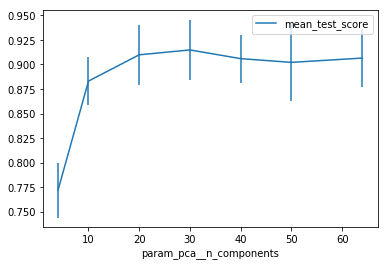

In [9]:
# 繪製不同採樣點的分類正確率
best_clf = cv_result.groupby('param_pca__n_components').apply(lambda x: x.nlargest(1, 'mean_test_score'))
best_clf.plot(x='param_pca__n_components', y = 'mean_test_score', yerr='std_test_score')
plt.show()

In [10]:
best_clf

,,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_logistic__alpha,param_pca__n_components,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
param_pca__n_components,,,,,,,,,,,,,,,,,,,,,,
4,7,0.440750,0.005795,0.771869,0.795343,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",13,0.782967,0.782973,...,0.805014,0.789986,0.789916,0.790278,0.754930,0.808599,0.305382,0.006139,0.027896,0.009737
10,1,0.454540,0.001999,0.883075,0.932663,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",11,0.909341,0.930216,...,0.885794,0.922809,0.910364,0.924306,0.853521,0.944521,0.102023,0.000632,0.024615,0.008843
20,9,0.525500,0.002400,0.909858,0.963825,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",2,0.928571,0.961619,...,0.910864,0.962448,0.955182,0.957639,0.884507,0.971567,0.069084,0.000799,0.030409,0.004671
30,10,1.116362,0.002399,0.914840,0.974400,0.01,30,"{'logistic__alpha': 0.01, 'pca__n_components':...",1,0.934066,0.975576,...,0.922006,0.972879,0.957983,0.972917,0.881690,0.977809,0.343007,0.000490,0.030677,0.002000
40,11,1.716619,0.009395,0.905948,0.976901,0.01,40,"{'logistic__alpha': 0.01, 'pca__n_components':...",5,0.917582,0.972087,...,0.919220,0.977747,0.938375,0.975000,0.878873,0.981276,0.607631,0.012348,0.024542,0.003127
50,5,1.123959,0.007398,0.902146,0.995547,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",7,0.906593,0.993719,...,0.924791,0.995828,0.957983,0.995139,0.876056,0.996533,0.530174,0.006616,0.038890,0.001048
64,6,1.068790,0.003598,0.906542,0.995270,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",3,0.909341,0.994417,...,0.922006,0.995132,0.952381,0.993750,0.876056,0.995839,0.409684,0.002153,0.029690,0.001196
